In [1]:
import pandas as pd
import psycopg2 
from dotenv import load_dotenv
import os

load_dotenv()

host = os.getenv("DB_HOST")
db = os.getenv("DB_NAME")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
try: 
    conn = psycopg2.connect(dbname=db, user=user, password=password, host=host, port=5433)
    cursor = conn.cursor()
except:
    print("Failed to connect to database. Please try again.")

In [4]:
cursor.execute('''SELECT * FROM jobs;''')

In [5]:
all = cursor.fetchall()

In [6]:
def create_df(cursor_list):
    vendorids = [tuple[1] for tuple in cursor_list]
    ids = [tuple[0] for tuple in cursor_list]
    positionnames = [tuple[2] for tuple in cursor_list]
    companys = [tuple[3] for tuple in cursor_list]
    locations = [tuple[4] for tuple in cursor_list]
    searchterms = [tuple[5] for tuple in cursor_list]
    searchareas = [tuple[6] for tuple in cursor_list]
    scrapedats = [tuple[7] for tuple in cursor_list]
    createdats = [tuple[8] for tuple in cursor_list]
    postedats = [tuple[9] for tuple in cursor_list]
    salarys = [tuple[10] for tuple in cursor_list]
    benefits = [tuple[11] for tuple in cursor_list]
    requirements = [tuple[12] for tuple in cursor_list]
    descriptions = [tuple[13] for tuple in cursor_list]
    indeedlinks = [tuple[14] for tuple in cursor_list]

    df = pd.DataFrame(data = {'id': ids, 'vendorid': vendorids, 'positionname': positionnames, 'company': companys, 'location': locations, 'searchterm': searchterms, 'searcharea': searchareas, 'scrapedat': scrapedats, 'createdat': createdats, 'postedat': postedats, 'salary': salarys, 'benefits': benefits, 'requirements': requirements, 'description': descriptions, 'indeedlink': indeedlinks})

    return df

In [7]:
df = create_df(all)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104181 entries, 0 to 104180
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104181 non-null  int64         
 1   vendorid      104181 non-null  object        
 2   positionname  104181 non-null  object        
 3   company       104181 non-null  object        
 4   location      104181 non-null  object        
 5   searchterm    104181 non-null  object        
 6   searcharea    104181 non-null  object        
 7   scrapedat     104181 non-null  datetime64[ns]
 8   createdat     104181 non-null  datetime64[ns]
 9   postedat      0 non-null       object        
 10  salary        56560 non-null   object        
 11  benefits      0 non-null       object        
 12  requirements  0 non-null       object        
 13  description   104181 non-null  object        
 14  indeedlink    104181 non-null  object        
dtypes: datetime64[ns]

In [9]:
df['searcharea'].value_counts()

New York, New York               4363
Washington, DC                   4360
Chicago, Illinois                4360
Los Angeles, California          4343
Boston, Massachusetts            4340
Dallas, Texas                    4306
Baltimore, Maryland              4292
Phoenix, Arizona                 4289
Seattle, Washington              4266
Denver, Colorado                 4236
San Francisco, California        4197
Philadelphia, Pennsylvania       4171
Charlotte, North Carolina        4171
Las Vegas, Nevada                4159
Fort Worth, Texas                4133
San Diego, California            4107
Columbus, Ohio                   4103
Detroit, Michigan                4103
Nashville-Davidson, Tennessee    4056
Portland, Oregon                 4027
Indianapolis, Indiana            3998
Jacksonville, Florida            3855
Milwaukee, Wisconsin             3399
Memphis, Tennessee               3396
El Paso, Texas                   2814
San Jose, California             2337
Name: search

# Visualizations

In [ ]:
'''Ideas
Num jobs by title
Num jobs by city/area
Commonly used buzz words in job descriptions - later
Num jobs that are entry level
Most in demand job in state or city
Amount of jobs over time
Popularity of searchTerm of cities'''

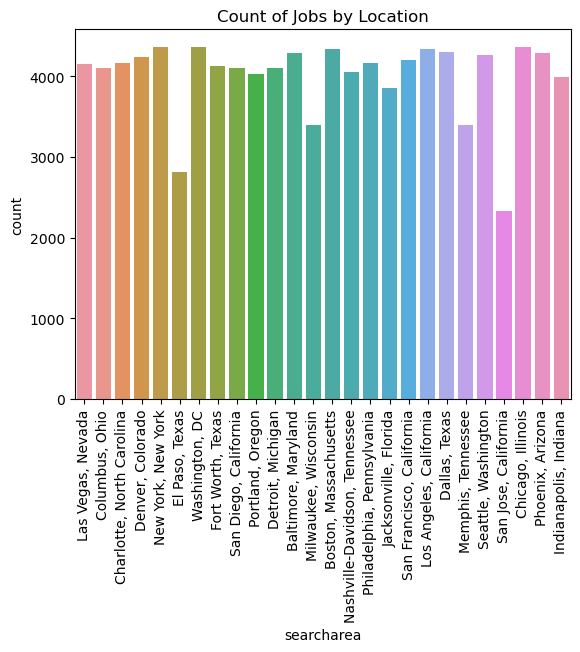

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.plot()
sns.countplot(x=df['searcharea'])
plt.xticks(rotation=90)
plt.title("Count of Jobs by Location")
plt.show()  

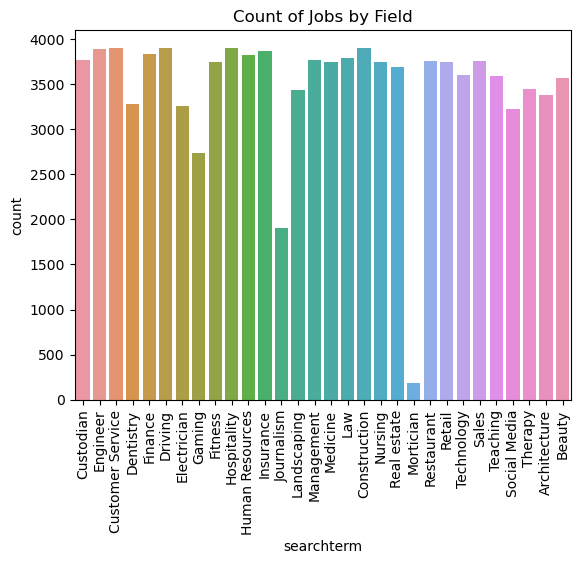

In [16]:
sns.countplot(x=df['searchterm'])
plt.xticks(rotation=90)
plt.title('Count of Jobs by Field')
plt.show()  

In [25]:
technology_jobs = df[df['searchterm'] == 'Technology']

In [39]:
top_10_tech_job_titles = pd.value_counts(technology_jobs['positionname']).iloc[:10]

In [46]:
top_10_tech_job_titles.index

Index(['Software Engineer', 'System Administrator', 'Senior Software Engineer', 'Network Engineer', 'Business Analyst', 'Data Analyst', 'Software Developer', 'Systems Administrator', 'Senior Data Analyst', 'Project Manager'], dtype='object')

In [53]:
top_10_tech_jobs = technology_jobs[technology_jobs['positionname'].isin(top_10_tech_job_titles.index)]

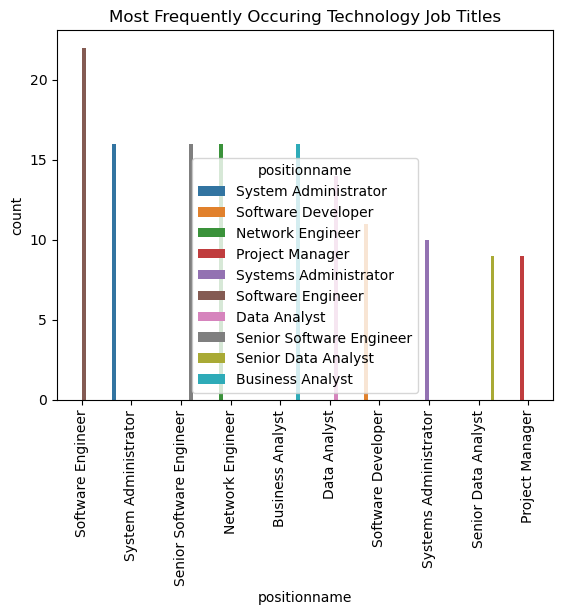

In [55]:
sns.countplot(data=top_10_tech_jobs, x='positionname', order=top_10_tech_job_titles.index, hue='positionname')
plt.xticks(rotation=90)
plt.title('Most Frequently Occuring Technology Job Titles')
plt.show()  

<AxesSubplot:>

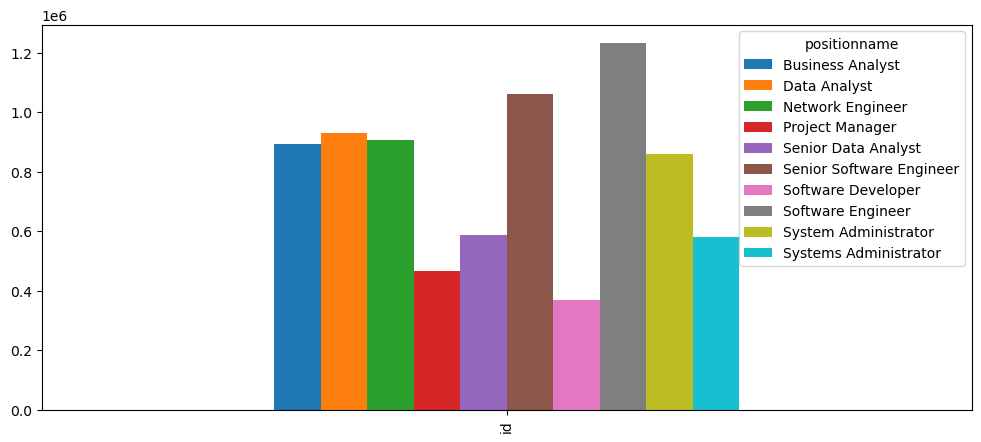

In [63]:
top_10_tech_jobs.groupby('positionname').sum().transpose().plot.bar(figsize=(12, 5))

In [18]:
grouped_df = df.groupby(['searchterm', 'searcharea']).size().unstack(fill_value=0)
grouped_df

searcharea,"Baltimore, Maryland","Boston, Massachusetts","Charlotte, North Carolina","Chicago, Illinois","Columbus, Ohio","Dallas, Texas","Denver, Colorado","Detroit, Michigan","El Paso, Texas","Fort Worth, Texas","Indianapolis, Indiana","Jacksonville, Florida","Las Vegas, Nevada","Los Angeles, California","Memphis, Tennessee","Milwaukee, Wisconsin","Nashville-Davidson, Tennessee","New York, New York","Philadelphia, Pennsylvania","Phoenix, Arizona","Portland, Oregon","San Diego, California","San Francisco, California","San Jose, California","Seattle, Washington","Washington, DC"
searchterm,,,,,,,,,,,,,,,,,,,,,,,,,,
Architecture,150,150,150,150,150,150,150,150,27,150,150,135,148,150,68,0,150,150,149,150,150,150,150,0,151,150
Beauty,149,150,150,150,150,150,151,88,39,128,112,94,301,150,61,101,147,150,151,150,150,112,150,134,150,151
Construction,150,150,150,150,150,150,149,149,150,150,150,150,150,150,150,150,151,150,150,150,149,150,150,150,150,150
Custodian,150,150,150,150,150,150,150,149,65,150,150,139,152,150,116,150,150,150,150,150,150,150,150,150,150,150
Customer Service,152,150,150,150,151,150,150,150,150,150,150,150,151,150,150,150,150,150,150,150,150,150,150,150,150,151
Dentistry,150,151,142,150,127,150,150,150,41,150,98,90,83,150,46,113,107,150,150,150,105,129,150,100,151,150
Driving,151,150,150,150,150,150,151,150,149,150,150,150,150,150,150,150,150,150,150,150,151,150,150,150,150,150
Electrician,126,150,150,151,150,150,150,105,56,150,132,108,91,123,47,118,98,150,150,150,150,125,68,150,115,150
Engineer,150,149,150,152,150,150,149,150,150,150,150,149,148,150,150,150,150,150,150,150,149,150,149,150,148,150


In [20]:
def filter_jobs_missing_expected_keywords(jobs_list, keywords):
    jobs_missing_keywords_in_titles = jobs_list.copy()
    for word in keywords:
        jobs_missing_keywords_in_titles = [job for job in jobs_missing_keywords_in_titles if word.lower() not in job.lower()]
    return jobs_missing_keywords_in_titles

In [21]:
tech_keywords = ['Administrator', 'AEM', 'Agile', 'Analyst', 'Analytics', 'Architect', 'Automation', 'Cloud', 'Cyber', 'DBA', 'Data', 'DevOps', 'Developer', 'Engineer', 'Help', 'IT', 
                 'Java', 'Machine Learning', 'ML', 'Mobile', 'Network', 'Oracle', 'Product', 'Program', 'Programmer', 'Project', 'Python', 'QA', 'SAP', 'Salesforce', 'Scrum', 
                 'Service Desk', 'Software', 'Support', 'System', 'Tech', 'Technology', 'Tester', 'UI', 'UX', 'User Experience', 'Watch Desk', 'Web', 'Windows']

In [22]:
sus_titles = filter_jobs_missing_expected_keywords(list(technology_jobs['positionname']), tech_keywords)
print(sus_titles)

['Senior Associate, Insider Risk Management - Remote', 'Backup Storage and Recovery Specialist', 'Entry Level Traveling Customer Trainer', 'Workday HCM Payroll, Senior Associate', 'Entry Level Customer Training Specialist – Traveling', 'PMO Manager', 'Business Analysis Associate II', 'Computer Operator', 'Director of Finance', 'Business Applications Lead', 'WF Mainframe', 'Associate Director, Experience Design', 'Azure lead', 'release manager', 'Epic Inpatient Clinical Documentation Consultant', 'GUCCI Associate Store Director - Charlotte', 'Operational Risk Specialist (contract)', 'RESEARCH & KNOWLEDGE MANAGEMENT SPECIALIST', 'GUCCI Associate Store Director - Charlotte', 'Genesys Voice Consultant', 'RESEARCH & KNOWLEDGE MANAGEMENT SPECIALIST', 'Risk Manager', 'Delivery Director', 'Field Observer-Electrical', 'AI Research Assoc Sr', 'Mid-level Interaction Designer - Remote', 'Founding CTO', 'BCMA SANCTIONS RISK OFFICER - Financial Crime Risk and Control (Hybrid)', 'Content Strategy Lea

In [23]:
len(sus_titles)

162